<a target="_blank" href="https://colab.research.google.com/github/sonder-art/fdd_o23/blob/main/codigo/polars/03_no_lazy.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [3]:
#!pip install polars

In [4]:
import polars as pl
import matplotlib.pyplot as plt

# Visualizacion de Datos


ValueError: setting an array element with a sequence.

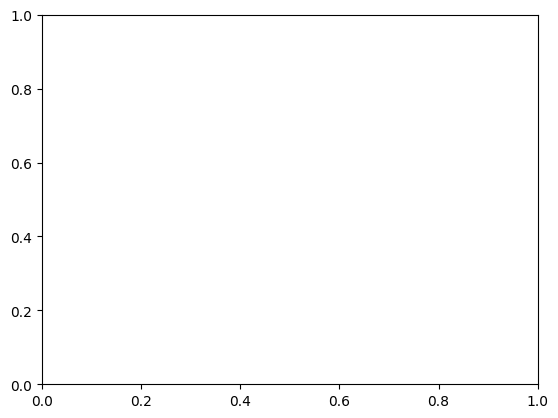

In [6]:
# Crear un DataFrame
df = pl.DataFrame({
    "x": [1, 2, 3, 4, 5],
    "y": [5, 4, 3, 2, 1]
})

# Intento de graficar usando evaluación perezosa - Esto no funcionará
lazy_df = df.lazy()
plt.plot(lazy_df.select("x"), lazy_df.select("y"))  # Error: No se puede acceder a los datos directamente
plt.show()


# Operaciones Interactivas o de Tiempo Real

In [8]:
# Supongamos que necesitamos una entrada del usuario basada en los datos
lazy_df = df.lazy()
user_input = input("Ingrese un valor basado en la columna 'x': ")  # Supone que el usuario necesita ver los datos
filtered_df = lazy_df.filter(pl.col("x") == user_input)  # Esto no funcionará correctamente
filtered_df

<LazyFrame [2 cols, {"x": Int64, "y": Int64}] at 0x7FC0350C1410>

# Debugging

In [10]:
lazy_df = df.lazy().with_columns(pl.col("x") / 0)  # Supongamos que hay un error aquí

# El error no se revelará hasta que se ejecute la operación
try:
    print(lazy_df.collect())  # Aquí se revelará el error
except ZeroDivisionError:
    print("Error de división por cero detectado")


shape: (5, 2)
┌─────┬─────┐
│ x   ┆ y   │
│ --- ┆ --- │
│ f64 ┆ i64 │
╞═════╪═════╡
│ inf ┆ 5   │
│ inf ┆ 4   │
│ inf ┆ 3   │
│ inf ┆ 2   │
│ inf ┆ 1   │
└─────┴─────┘
